In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simps
from scipy.interpolate import interp1d
from glob import glob
import pandas as pd
import astropy.units as u

from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
x_gamma = lambda Egamma, Mbh : Egamma / (1058 * 1e10 / Mbh)

# parameterization in Eq . (31 - 34) of 1510.04372, all in GeV^-1 sec^-1
A = 6.339 * 1e23
B = 1.1367 * 1e24
thetaS = lambda u : .5 * (1 + np.tanh(10 * u))

def frag(Egamma, Mbh):
    return (
        A * x_gamma(Egamma, Mbh)**(-3/2) * ( 1 - thetaS( x_gamma(Egamma, Mbh) - 0.3 ) ) + 
        B * np.exp( -x_gamma(Egamma, Mbh) ) * thetaS( x_gamma(Egamma, Mbh) - 0.3 ) / ( x_gamma(Egamma, Mbh) * ( x_gamma(Egamma, Mbh) + 1 ) ) 
    )

def Ffunc(y):
    val = np.exp( -.0962 - 1.982 * (np.log(y) - 1.908) * (1 + np.tanh(20 * (np.log(y) - 1.908)) ))
    val[np.where(y <= 2)] = 1
    return val

def dir(Egamma, Mbh):
    return (
        1.13 * 1e19 * x_gamma(Egamma, Mbh)**6 / ( (np.exp(x_gamma(Egamma, Mbh)) - 1) * Ffunc(x_gamma(Egamma, Mbh)) )
    )

Mbh = lambda time : 1e10 * (time/407)**(1/3)

parameter_photon_flux = lambda time, Egamma: dir(Egamma, Mbh(time)) + frag(Egamma, Mbh(time))
parameter_photon_flux_mass = lambda mass, Egamma: dir(Egamma, mass) + frag(Egamma, mass)

0.0001058
1.058
1058.0


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


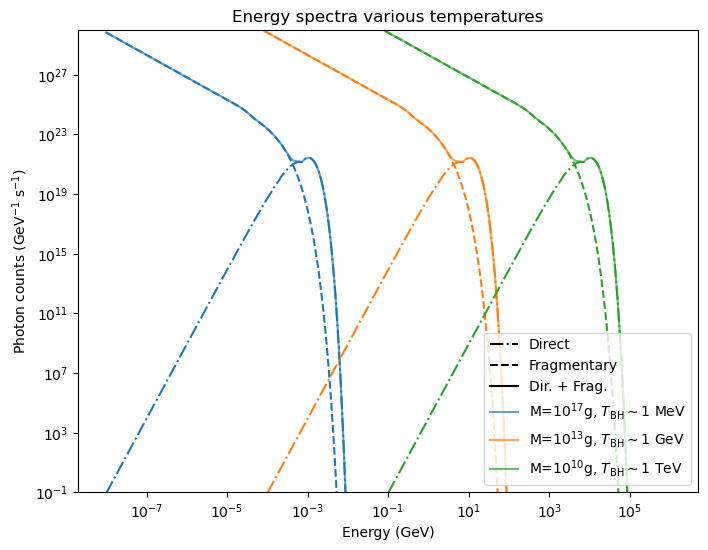

In [3]:
Tbh_mass = lambda Mbh : 1.058 * 1e13 / Mbh

print(Tbh_mass(1e17))
print(Tbh_mass(1e13))
print(Tbh_mass(1e10))

fig, ax = plt.subplots(figsize = (8,6))

E = np.logspace(-8, 6, 10_000)

ax.loglog(0,0, '-.', color = 'black', label = 'Direct')
ax.loglog(0,0, '--', color = 'black', label = 'Fragmentary')
ax.loglog(0,0, '-', color = 'black', label = 'Dir. + Frag.')

# M in g, Temp in GeV
temp_from_mass = lambda M: 1.06 * (1e13 / M) # GeV

# plt.loglog( E, dir(E,1e20) + frag(E,1e20), '-', color = 'C0', label = r'M=$10^{20}$' )

ax.loglog( E, dir(E,1e17) + frag(E,1e17), '-', color='C0', alpha = .7, label = r'M=$10^{17}$g, $T_{\rm{BH}}\sim$1 MeV')
ax.loglog( E, dir(E,1e17), '-.', color='C0')
ax.loglog( E, frag(E,1e17), '--', color='C0')

# plt.axvline(temp_from_mass(1e14), linestyle='--', color = 'C0', label = r'$T_{BH}=$%s GeV'%(temp_from_mass(1e14)))

# plt.loglog( E, dir(E,1e12), '--', color='C0', label = r'Dir M=$10^{12}$' )
# plt.loglog( E, frag(E,1e12), '--', color='C0', label = r'Frag M=$10^{12}$' )

ax.loglog( E, dir(E,1e13) + frag(E,1e13), '-', color = 'C1', alpha = .7, label = r'M=$10^{13}$g, $T_{\rm{BH}}\sim$1 GeV')
ax.loglog( E, dir(E,1e13), '-.', color='C1')
ax.loglog( E, frag(E,1e13), '--', color='C1')
# plt.axvline(temp_from_mass(1e6), linestyle='--', color = 'C1', label = r'$T_{BH}=$%s GeV'%(temp_from_mass(1e6)))
# plt.loglog( E, dir(E,1e6), '--', color = 'C1', label = r'Dir M=$10^6$' )
# plt.loglog( E, frag(E,1e6), '--', color = 'C1', label = r'Frag M=$10^6$' )


ax.loglog( E, dir(E,1e10) + frag(E,1e10), '-', color = 'C2', alpha = .7, label = r'M=$10^{10}$g, $T_{\rm{BH}}\sim$1 TeV')
ax.loglog( E, dir(E,1e10), '-.', color='C2')
ax.loglog( E, frag(E,1e10), '--', color='C2')

ax.legend()

# plt.loglog(E, 1e33*E**(-1.5))

ax.set_title(r'Energy spectra various temperatures')
ax.set_ylim(1e-1, 1e30)

ax.set_xlabel('Energy (GeV)')
ax.set_ylabel(r'Photon counts (GeV$^{-1}$ s$^{-1}$)')
fig.savefig('EnergySpectrumVaryingTemp.png')

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in true_divide
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/scipy/integrate/_quadrature.py:497: RuntimeWarning: invalid value encountered in double_scalars
  result = result + val


Text(0, 0.5, 'Photon counts (s$^{-1}$)')

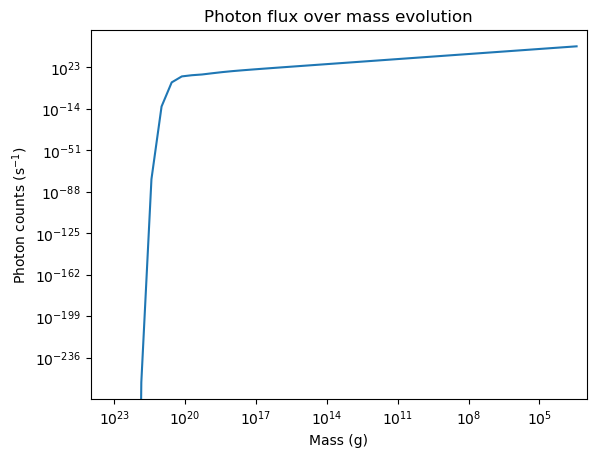

In [4]:
Emin = 1e-6
Emax = 1e11
Erange = np.logspace(-6, 11)

fluxdt = [ simps(parameter_photon_flux_mass(Erange, mass), x = Erange ) for mass in np.logspace(24, 3) ]

plt.loglog(np.logspace(24, 3), fluxdt, label = r'$\frac{d\Phi}{dt}$')

plt.xlim(1e24,1e3)
plt.title('Photon flux over mass evolution')
plt.xlabel('Mass (g)')
plt.ylabel(r'Photon counts (s$^{-1}$)')

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


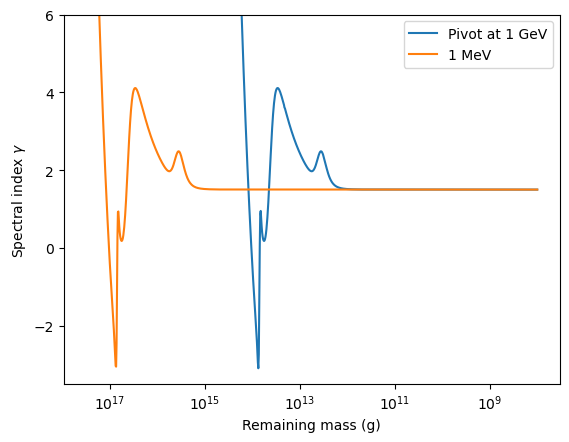

In [5]:
fig, ax = plt.subplots()

gamma = lambda E1,E2, t : (np.log(parameter_photon_flux_mass(np.array([E1]),t)[0]) - np.log(parameter_photon_flux_mass(np.array([E2]),t)[0])) / (np.log(E2)-np.log(E1))

E1, E2 = (1.01, 0.99)
index_evolution = [gamma(E1,E2, m) for m in np.logspace(8, 18, 1000)]
ax.plot(np.logspace(8, 18, 1000), index_evolution, label = 'Pivot at 1 GeV')

E1, E2 = (1.01*1e-3, 0.99*1e-3)
index_evolution = [gamma(E1,E2, m) for m in np.logspace(8, 17.5, 1000)]
ax.plot(np.logspace(8, 17.5, 1000), index_evolution, label = '1 MeV')

ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])
ax.set_ylim(-3.5, 6)
ax.set_xlabel(r'Remaining mass (g)')
ax.set_ylabel(r'Spectral index $\gamma$')
ax.legend()
fig.savefig('SpectralIndexvsTau.png')

In [6]:
EffectiveAreas = {
    detector[:-4].split('/')[-1] : 
    pd.read_csv(detector, sep=' ', header=None, names = ['E GeV', 'Aeff cm2'])
    for detector in glob('./EffectiveAreas/*')
    }
del EffectiveAreas['propermotion']


def N_S(Egamma:list, time, Aeff, distance):
    fluxdt = [ simps( parameter_photon_flux(Egamma, t) * Aeff(Egamma) / (4*3.14159 * distance**2), x = Egamma) for t in list(time) ]
    return fluxdt

instantaneous_N_S = lambda Egamma, time, Aeff, distance : simps( parameter_photon_flux(Egamma, time) * Aeff(Egamma), x = Egamma) / (4*3.14159 * distance**2)

Text(0.5, 1.0, 'Effective areas of detectors')

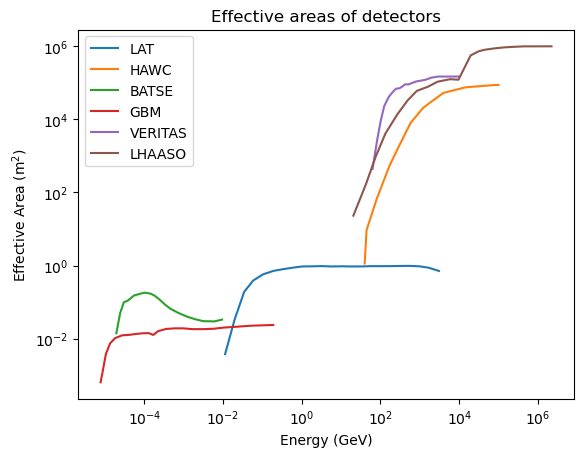

In [7]:
fig, ax = plt.subplots()

for Aeff in EffectiveAreas:
    E = EffectiveAreas[Aeff]['E GeV']
    ax.loglog(E, interp1d(x = E, y = EffectiveAreas[Aeff]['Aeff cm2'] * (u.cm.to('m'))**2, kind='linear', bounds_error = False, fill_value = 0.)(E), label = Aeff)

ax.legend()
ax.set_xlabel('Energy (GeV)')
ax.set_ylabel('Effective Area (m$^2$)')
ax.set_title('Effective areas of detectors')

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


(1000000000.0, 0.001)

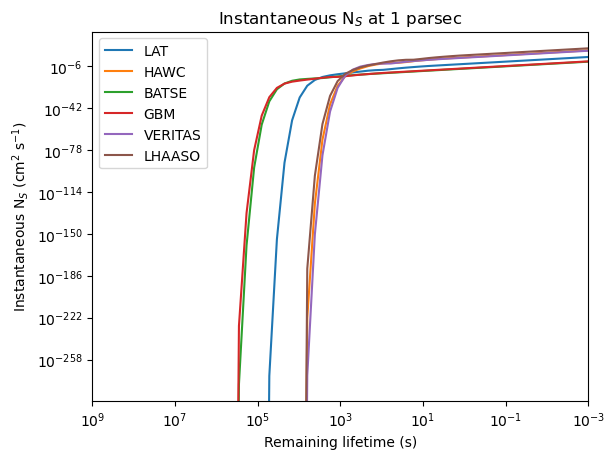

In [8]:
Erange = np.logspace(-6, 7)

for detector in EffectiveAreas:
    Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )

    plt.loglog(np.logspace(-3,6), [instantaneous_N_S( Erange, t, Aeff, 1 * u.pc.to('cm') ) for t in np.logspace(-3, 9)] , label = detector)

plt.legend()
plt.xlabel('Remaining lifetime (s)')
plt.ylabel('Instantaneous N$_S$ (cm$^2$ s$^{-1}$)')
plt.title('Instantaneous N$_S$ at 1 parsec')
plt.xlim(1e9, 1e-3)

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, 'Maximum distance that $N_S$ > 10 ph (-- incl. d$\\Omega$)')

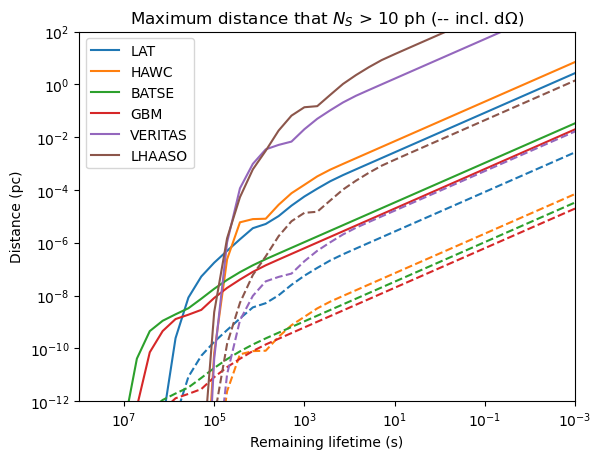

In [9]:
time = np.logspace(9, -5)
distances = np.logspace(-4, 1)

Eranges = { # (Emin, Emax) in log GeV
    'LAT': (-2, 3),
    'GBM': (-4, -2),
    'BATSE': (-5, -2),
    'HAWC': (1, 2),
    'VERITAS': (1, 4),
    'LHAASO': (1,6)
}

dOm = {
    'LAT': 1e-3,
    'GBM': 1e-3,
    'BATSE': 1e-3,
    'HAWC': 1e-5,
    'VERITAS': 1e-5,
    'LHAASO': 1e-4
}

for i,detector in enumerate(EffectiveAreas):
    Erange = np.logspace(Eranges[detector][0], Eranges[detector][1])

    Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )

    det_break = []
    for t in time: 
        # Solve directly for the d contour (set d=1 and then calculate-back d = sqrt( n_s / (4pi * 10) )
        det_break.append( np.sqrt( instantaneous_N_S( Erange, t, Aeff, 1 ) / 10 ) * u.cm.to('pc') )

    det_break = np.array(det_break)

    plt.loglog(time, det_break, color = 'C%s'%i, label = detector)
    plt.loglog(time, det_break * dOm[detector], '--', color = 'C%s'%i)

#plt.axhline(10, linestyle = '--', color = 'black', label = '10 photons')
plt.legend()
plt.xlabel('Remaining lifetime (s)')
plt.ylabel('Distance (pc)')
plt.ylim(1e-12, 1e2)
plt.xlim(1e8, 1e-3)
plt.title('Maximum distance that $N_S$ > 10 ph (-- incl. d$\Omega$)')

In [10]:
Ebkg = lambda E: 1.4*1e-6 * E**(-2.1) #cm-2 GeV-1 s-1 sr-1

def N_B(Egamma, time, Aeff, dOm):
    return time * simps(Aeff(Egamma) * dOm * Ebkg(Egamma), x = Egamma)

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp


Text(0.5, 1.0, '$\\sigma$ signal over background wrt. time, at 1pc')

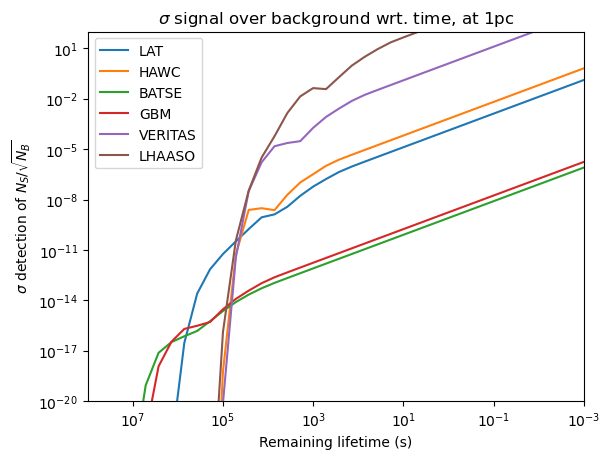

In [11]:
for i,detector in enumerate(EffectiveAreas):
    Erange = np.logspace(Eranges[detector][0], Eranges[detector][1])
    Om = dOm[detector]
    Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )

    signal = time * np.array(N_S(Erange, time, Aeff, 1*u.pc.to('cm'))) * Om
    background = np.array(N_B(Erange, time, Aeff, Om))

    plt.loglog(time, signal/np.sqrt(background), color = 'C%s'%i, label = detector)

#plt.axhline(10, linestyle = '--', color = 'black', label = '10 photons')
plt.legend()
plt.xlabel('Remaining lifetime (s)')
plt.ylabel(r'$\sigma$ detection of $N_S/\sqrt{N_B}$')
plt.xlim(1e8, 1e-3)
plt.ylim(1e-20,1e2)
plt.title('$\sigma$ signal over background wrt. time, at 1pc')

In [12]:
def detN(Egamma, time, Aeff, dOm):
    fluxdt = [ simps(dOm * Aeff(Egamma) * photon_flux(Egamma, t), x = Egamma) for t in time ]
    return simps(fluxdt, x = time)

def detSN(sig, Egamma, Aeff, dOm, tau):
    noise = np.sqrt( min( 3e7, tau ) * simps(dOm * Aeff(Egamma) * Ebkg(Egamma), x = Egamma) )
    return sig/noise

In [13]:
for i,detector in enumerate(EffectiveAreas):
    Erange = np.logspace(Eranges[detector][0], Eranges[detector][1])
    Om = dOm[detector]
    Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )

    remaining_lifetime = np.logspace(-1, 8)

    max_dist = []
    for tau in remaining_lifetime:
        time = np.logspace( np.log10( max(1e-1, tau - 3e7) ), np.log10(tau))
        N = detN(Erange, time, Aeff, Om) / (4 * 3.14159) # let d=1 to just cancel out
        Ns = detSN(N, Erange, Aeff, Om, tau) / (4 * 3.14159)
        max_dist.append( min(
            np.sqrt( N/10 ) * u.cm.to('pc'),
            np.sqrt( Ns/5 ) * u.cm.to('pc'),
                ) )
    
    plt.loglog(remaining_lifetime, max_dist, color = 'C%s'%i, label = detector)

plt.legend()
plt.xlabel('Time (s) (log)')
plt.ylabel('Maximum distance (pc)')
plt.ylim(1e-9, 1e1)
plt.xlim(1e8, 1e-1)
    
    

NameError: name 'photon_flux' is not defined

In [13]:
def logNormalMassFcn(sigma, Mstar, M):
    return np.exp(
        -np.log(M/Mstar)**2 / (2 * sigma**2)
    ) / (np.sqrt(2 * 3.14159) * sigma * M)

fPBH = 1e-7
gramsperGeV = 1 / (5.6095886*1e23)
rhoDM = 0.4 * gramsperGeV * (u.pc.to('cm')**3)

def numberDensity(mass, distance, Mstar = 1e10, sigma = 1, fPBH = 1):
    return  logNormalMassFcn(sigma, Mstar, mass) * rhoDM * fPBH * 4 / 3 * 3.14159 * distance**3

In [14]:
alpha = lambda M: 4 * 1e-4 * M**2

def evolvedMassFunction(sigma, Mstar, M, time):
    return np.exp(
        -np.log( (M**3 + 3*alpha(M) * time)**(1/3) /Mstar)**2 / (2 * sigma**2)
    ) / (np.sqrt(2 * 3.14159) * sigma * (M**3 + 3*alpha(M) * time)**(1/3) * (M**3 / (M**3 + 3*alpha(M) * time)))

def evolvedNumberDensity(mass, distance, Mstar = 1e10, sigma = 1, age_of_universe = 4 * 1e9 * 365 * 24 * 60 * 60):
    return  evolvedMassFunction(sigma, Mstar, mass, age_of_universe) * rhoDM * fPBH * 4 / 3 * 3.14159 * distance**3

Text(0.5, 1.0, 'Log PBH number density with evolved mass function')

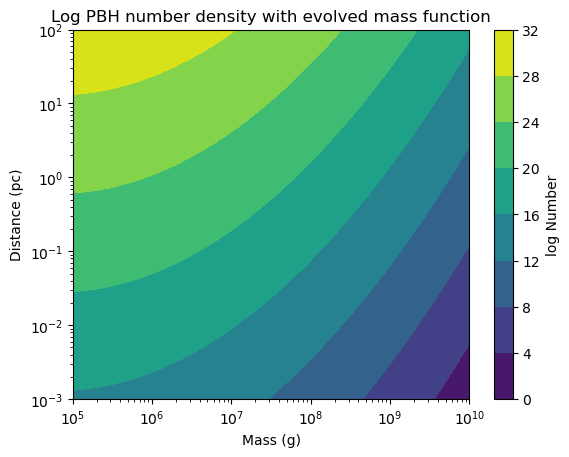

In [15]:
mass = np.logspace(5,10)
distance = np.logspace(-3,2)
M,D = np.meshgrid(mass, distance)

sigma = 1
Mstar = 1e9

plt.contourf( M, D, np.log10(evolvedNumberDensity(M,D,Mstar,sigma)) )#, levels = [-15, -10, -5, 0, 5, 10, 15] )
cb = plt.colorbar(label = 'log Number')
plt.xlabel('Mass (g)')
plt.ylabel('Distance (pc)')
plt.yscale('log')
plt.xscale('log')
plt.title('Log PBH number density with evolved mass function')

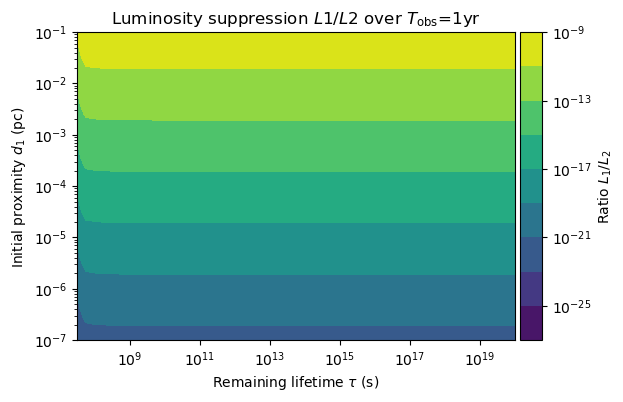

In [16]:
### Change in luminosity plot

# Galactic dispersion
v = (200 * u.km / u.s).to('pc/yr').value
# pg. 23 velocity dispersion of an L⋆ galaxy is σ∥ ≃ 200 km s−1
# pg. 356 quotes ~O(2)
# pg. 646 

luminosity_supp = lambda tau, Tobs = 3e7, d1 = 1e-3, beta = -.3: (tau /(tau - Tobs) )**beta * (d1 / (d1 + v*Tobs))**2

# tau = np.logspace(0,20, 1000)
# mesh = np.zeros((1000,1000))
# for i,Tobs in enumerate(np.logspace(0,np.log10(3e7), 1000)):
#     mesh[i][ np.where(tau[i] <= Tobs) ] = luminosity_supp(tau[i][tau[i] <= Tobs], Tobs = tau[i][tau[i] <= Tobs])
#     mesh[i][ np.where(tau[i] > Tobs) ] = luminosity_supp(tau[i][tau[i] > Tobs], Tobs = 3e7)

# tau, Tobs = np.meshgrid(
#     np.logspace(0,20, 1000),
#     np.logspace(0,np.log10(3e7), 1000)
# )

# fig, ax = plt.subplots()

# divider = make_axes_locatable(ax)
# cax = divider.append_axes('right', size='5%', pad=0.05)

# ct = ax.contourf(Tobs, tau, mesh, norm = LogNorm())

# cb = fig.colorbar(ct, cax = cax)

# ax.set_yscale('log')
# ax.set_xscale('log')
# ax.set_xlabel(r'Observation time $T_{\rm{obs}}$ (s)')
# ax.set_ylabel(r'Remaining lifetime $\tau$ (s)')

tau, d1 = np.meshgrid(
    np.logspace(np.log10(3e7),20),
    np.logspace(-7, -1)
)

fig, ax = plt.subplots(figsize = (6, 4))

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

lum = luminosity_supp(tau, d1 = d1)

ct = ax.contourf(tau, d1, lum, norm = LogNorm())

cb = fig.colorbar(ct, cax = cax, ticks = [1e-9, 1e-13, 1e-17, 1e-21, 1e-25], label = r'Ratio $L_1 / L_2$')
cb.ax.set_yticklabels( [r'$10^{%.f}$'%np.log10(t) for t in [1e-9, 1e-13, 1e-17, 1e-21, 1e-25]]  )

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'Remaining lifetime $\tau$ (s)')
ax.set_ylabel(r'Initial proximity $d_1$ (pc) ')
ax.set_title(r'Luminosity suppression $L1/L2$ over $T_{\rm{obs}}$=1yr')

fig.savefig('TransientLuminosity.png')



In [17]:
Mbh = lambda time : 1e10 * (time/407)**(1/3)
tau_mass = lambda Mbh : 407 * (Mbh/1e10)**3

Tbh_mass = lambda Mbh : 1.058 * 1e13 / Mbh
Tbh_tau = lambda tau : 1.058 * 1e13 / Mbh(tau)



def photon_flux(Egamma, Tbh):
    try: 
        assert len(Tbh) > 1, 'Tbh is not vector'
        x = 9*1e35*np.ones((len(Egamma), len(Tbh)))
        for i in range(len(Egamma)):
            for j in range(len(Tbh)):
                x[i,j] *= ( (1/Tbh[j])**1.5 * (1/Egamma[i])**1.5 if Egamma[i] < Tbh[j] else (1/Egamma[i])**3 )
        return x
    except:
        x = 9*1e35*np.ones(len(Egamma))
        for i in range(len(Egamma)):
            x[i] *= ( (1/Tbh)**1.5 * (1/Egamma[i])**1.5 if Egamma[i] < Tbh else (1/Egamma[i])**3 )
        return x

Text(0, 0.5, 'Photon counts (GeV$^{-1}$ s$^{-1}$)')

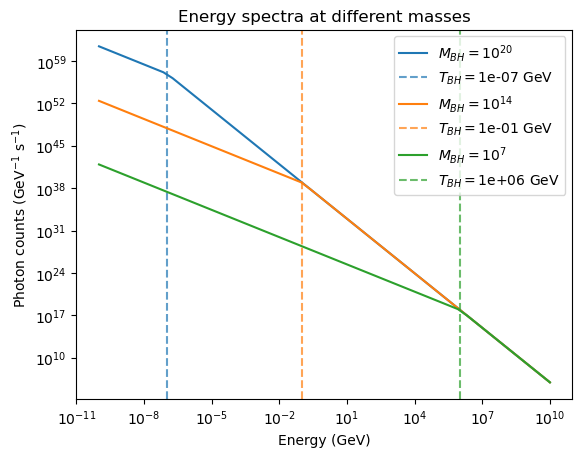

In [18]:
E = np.logspace(-10, 10)

# M in g, Temp in GeV
temp_from_mass = lambda M: 1.06 * (1e13 / M) # GeV

plt.loglog( E, photon_flux(E, Tbh_mass(1e20)), '-', color = 'C0', label = r'$M_{BH}=10^{20}$' )
plt.axvline(temp_from_mass(1e20), linestyle='--', color = 'C0', label = r'$T_{BH}=$%.e GeV'%(temp_from_mass(1e20)), alpha = 0.7)
plt.loglog( E, photon_flux(E, Tbh_mass(1e14)), '-', color='C1', label = r'$M_{BH}=10^{14}$' )
plt.axvline(temp_from_mass(1e14), linestyle='--', color = 'C1', label = r'$T_{BH}=$%.e GeV'%(temp_from_mass(1e14)), alpha = 0.7)
plt.loglog( E, photon_flux(E, Tbh_mass(1e7)), '-', color = 'C2', label = r'$M_{BH}=10^7$' )
plt.axvline(temp_from_mass(1e7), linestyle='--', color = 'C2', label = r'$T_{BH}=$%.e GeV'%(temp_from_mass(1e7)), alpha = 0.7)

plt.legend()

plt.title(r'Energy spectra at different masses')

plt.xlabel('Energy (GeV)')
plt.ylabel(r'Photon counts (GeV$^{-1}$ s$^{-1}$)')

Text(0, 0.5, 'Time-integrated SED (GeV $s^{-1}$)')

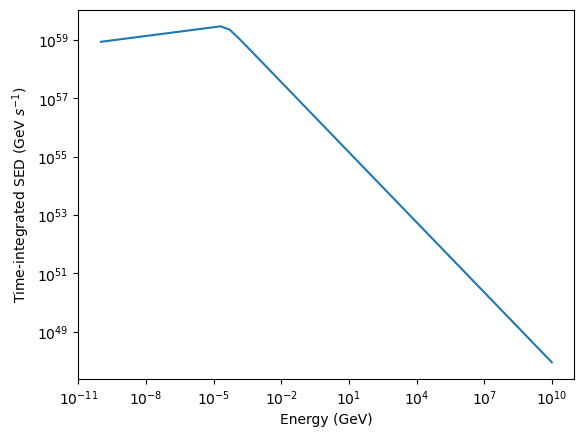

In [19]:
# This doesn't seem right
# Time-integrated energy spectrum
Egamma = np.logspace(-6,6)
tau = np.logspace(0,20)
Tbh = Tbh_tau(tau)

time_int_flux = []
for i in range(len(Egamma)):
    x = 9*1e35*np.ones(len(Tbh))
    for j in range(len(Tbh)):
        x[j] = 9*1e35*( (1/Tbh[j])**1.5 * (1/Egamma[i])**1.5 if Egamma[i] < Tbh[j] else (1/Egamma[i])**3 )
    time_int_flux.append( simps(x=tau, y=x) )

plt.loglog(E, E*np.array(time_int_flux))
plt.xlabel('Energy (GeV)')
plt.ylabel(r'Time-integrated SED (GeV $s^{-1}$)')

In [20]:
Ebkg = lambda E: 1.4*1e-6 * E**(-2.1) #cm-2 GeV-1 s-1 sr-1

gamma_had_sep = {
    'LAT': 0,
    'GBM': 0,
    'BATSE': 0,
    'HAWC': 1e-2,
    'VERITAS': 1e-1,
    'LHAASO': 1e-5
}

def CRbkg(Egamma, frej = 1e-5):
    """frej -> bkg rejection"""
    zz = [1]*len(Egamma)
    for i in range(len(Egamma)):
        zz[i] = max( frej * 1.2*7900*1e-4* Egamma[i]**-2.65,  Ebkg(Egamma[i]))
    return zz

In [21]:
# Proper motion contours
propmo_dat = pd.read_csv('./EffectiveAreas/propermotion.dat', sep=' ', header=None, names = [r'0.1$\circ$ proper motion', r'1$\circ$', r'10$\circ$'])
def log_interp(x,y):
    lin = interp1d(np.log10(x), np.log10(y), kind='linear', fill_value='extrapolate')
    return lambda z: 10**lin(np.log10(z))

In [22]:
year = 365 * 24 * 60 * 60

def detN(Egamma, tau, Aeff, dOm, obs_time, tmin = 1e-1):

    return (obs_time/tau) * simps(dOm * Aeff(Egamma) * photon_flux(Egamma, Tbh_tau(tau)), x = Egamma)

def detSN(sig, Egamma, Aeff, dOm, obs_time, frej):
    noise = np.sqrt( obs_time * simps(dOm * Aeff(Egamma) * CRbkg(Egamma, frej), x = Egamma) )
    return sig/noise

In [23]:
divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)

lum = luminosity_supp(tau, d1 = d1)

ct = ax.contourf(tau, d1, lum, norm = LogNorm())

cb = fig.colorbar(ct, cax = cax, ticks = [1e-9, 1e-13, 1e-17, 1e-21, 1e-25], label = r'Ratio $L_1 / L_2$')
cb.ax.set_yticklabels( [r'$10^{%.f}$'%np.log10(t) for t in [1e-9, 1e-13, 1e-17, 1e-21, 1e-25]]  )

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in power
  if __name__ == "__main__":


TypeError: Number of dimensions of x (1) and y (2) do not match

Max dist for LAT: 0.0008433601586678273
Max dist for HAWC: 0.00012401871019678077
Max dist for BATSE: 0.0004200501797608438
Max dist for GBM: 0.00027117248176506694
Max dist for VERITAS: 0.0008202969543244325
Max dist for LHAASO: 0.007726361861924353


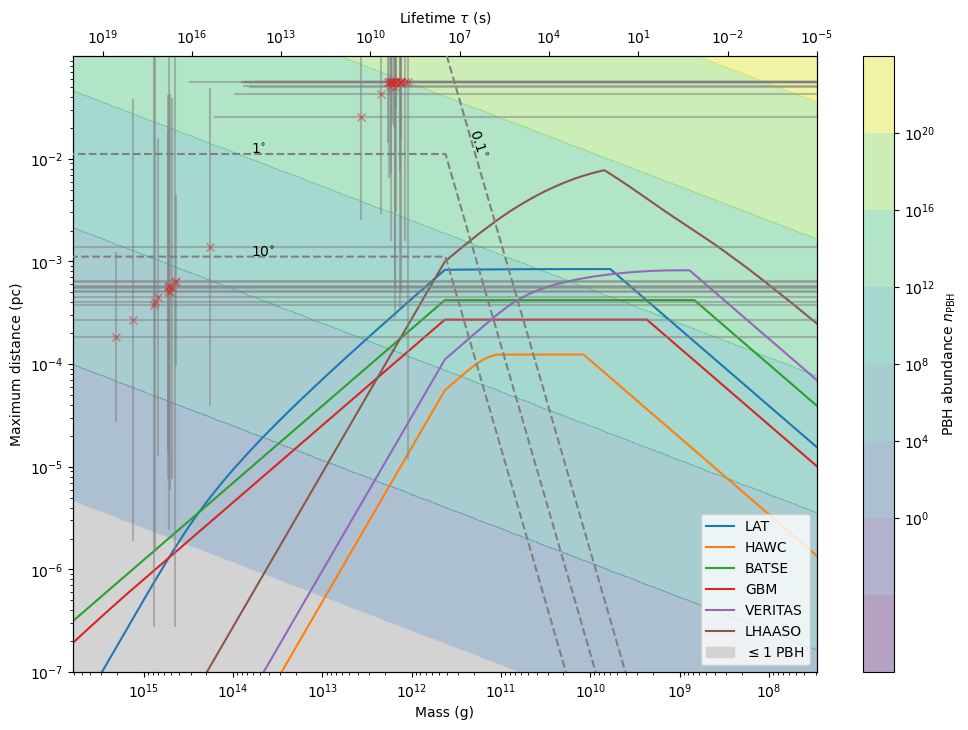

In [24]:
eval_lims_separate = True

distlim = {}

fig, ax = plt.subplots( figsize = (12,8) )

for i,detector in enumerate(EffectiveAreas):

    # Ranges and interpolation
    Erange = np.logspace(Eranges[detector][0], Eranges[detector][1])
    Om = dOm[detector]
    Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )

    #mass = np.logspace(8, 15, 1_000)
    remaining_lifetime = np.logspace(-5, 20, 1_000)
    tmin = remaining_lifetime[0]

    max_dist = []
    if eval_lims_separate:
        max_dist1 = []
        max_dist2 = []
    for tau in remaining_lifetime:
        
        # Either obs duration or remaining lifetime
        obs_time = min(year, tau)

        N = detN(Erange, tau, Aeff, Om, obs_time, tmin) / (4 * 3.14159) # let d=1 to just cancel out
        Ns = detSN(N, Erange, Aeff, Om, obs_time, gamma_had_sep[detector]) / (4 * 3.14159)
        max_dist.append( min(
            np.sqrt( N/10 ) * u.cm.to('pc'),
            np.sqrt( Ns/5 ) * u.cm.to('pc'),
                ) )
        if eval_lims_separate:
            max_dist1.append(np.sqrt( N/10 ) * u.cm.to('pc'))
            max_dist2.append(np.sqrt( Ns/5 ) * u.cm.to('pc'))

    
    mass = Mbh(remaining_lifetime)
    if eval_lims_separate:
        ax.loglog(mass, max_dist, color = 'C%s'%i, label = detector)
    else:
        ax.loglog(mass, max_dist1, '-', color = 'C%s'%i, label = f'{detector}: '+r'$N_S \geq 10$')
        ax.loglog(mass, max_dist2, '--', color = 'C%s'%i, label = f'{detector}: '+r'$\frac{N_S}{\sqrt{N_B}} \geq 5$')
        
    
    print(f'Max dist for {detector}: {max(max_dist)}')
    distlim[detector] = max(max_dist)

    if detector == 'LAT':
        LAT_curve_interp = interp1d(x = remaining_lifetime, y = max_dist, kind='linear', bounds_error = False, fill_value = 'extrapolate' )


# Keep track of axes
ylim = ax.get_ylim()

# Resize for reasonable PBH abundance
ax.set_ylim(*ylim)
ax.set_yticks([1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10])
ax.set_ylim(1e-7, 1e-1)
ylim = ax.get_ylim()

# Show population density

M,D = np.meshgrid(mass, np.logspace(np.log10(ylim[0]), np.log10(ylim[1])))
# sigma = 1
# Mstar = 1e10
# im = ax.contourf( M, D, np.log10(numberDensity(M,D,Mstar,sigma)) , alpha = .4)#, levels = [-15, -10, -5, 0, 5, 10, 15] )
# cb = plt.colorbar(im, label = 'log( number of PBHs )')
monochromatic_npbh = lambda dist, mass, rhoDM=.3, fPBH=1 : rhoDM * fPBH / (mass * 5.62e23) * (4/3*3.14159) * (dist * 3.086e18)**3
im = ax.contourf(M, D, np.log10(monochromatic_npbh(D, M)), alpha = .4)
cb = fig.colorbar(im, label = r'PBH abundance $n_{\rm{PBH}}$', ticks = [20, 16, 12, 8, 4, 0])
cb.ax.set_yticklabels( [r'$10^{%.f}$'%t for t in [20, 16, 12, 8, 4, 0]]  )

# Exclude the <=1PBH realm
v = im.collections[1].get_paths()[0].vertices
ax.fill_between(x = v[:,0], y1 = np.zeros(len(v[:,1])), y2  = v[:,1], label = r'$\leq 1$ PBH', color = 'lightgrey', hatch = '/')
v = im.collections[0].get_paths()[0].vertices
ax.fill_between(x = v[:,0], y1 = np.zeros(len(v[:,1])), y2  = v[:,1], color = 'lightgrey', hatch = '/')

ax.legend(loc='lower right')
#plt.xlabel('Time (s)')
ax.set_xlabel('Mass (g)')
ax.set_ylabel('Maximum distance (pc)')
xlim = ax.get_xlim()
ax.set_xlim(xlim[-1], xlim[0])


# Add the second axis for lifetime
ax2 = ax.twiny()
ax2.set_xticks(tau_mass(mass))
ax2.set_xscale('log')
# ax2.set_xlim(tau_mass(xlim[-1]), tau_mass(xlim[0]))
ax2.set_xlabel(r'Lifetime $\tau$ (s)')
# xlim = ax2.get_xlim()
ax2.set_xlim(tau_mass(mass)[-1], tau_mass(mass)[0])

####
if True: # SHOW TRANSIENT SOURCE FITS
    seconds_in_a_day = 8.64e4

    ##### Transient sources

    distance_A = lambda A: np.sqrt(3.2 / A)

    # Now show the fitted params overtop the fig
    transients = pd.read_csv('../TransientLATSources/TransientSources_fitted_params.csv')

    targets = transients[transients['T0 (MJD)'] < 1e16].dropna()

    T0 = seconds_in_a_day*targets['T0 (MJD)']
    targets['T0_lower_error'] = np.abs(T0 - targets['T0_min'])
    targets['T0_upper_error'] = np.abs(targets['T0_max'] - T0)
    d = targets['distance (pc)']
    targets['distance_lower_error'] = np.abs(d - targets['dist_max'])
    targets['distance_upper_error'] = np.abs(targets['dist_min'] - d)

    ax2.errorbar(x = T0, xerr = seconds_in_a_day*np.array([ targets['T0_lower_error'], targets['T0_upper_error'] ]),
                y = d, yerr = [ targets['distance_lower_error'], targets['distance_upper_error'] ],
                fmt = 'x', color='grey', markeredgecolor = 'C3', alpha=.5, zorder = 1,
                label = 'Fitted transient sources')
######


def proper_motion_curve(tau, velocity_dispersion = 200 * u.km.to('pc'), Tobs = 3e7, deg = 1):
    max_dist = 180 / 3.14159 * velocity_dispersion * tau / deg
    max_dist[np.where(tau > Tobs)] = 180 / 3.14159 * velocity_dispersion * Tobs / deg
    return max_dist

for deg in [1, 10]:
    curve = proper_motion_curve(tau_mass(mass), deg=deg)
    ax2.plot( tau_mass(mass), curve, zorder = 3, color = 'grey', linestyle = '--')
    ax2.text( 1e14, proper_motion_curve(np.array([1e14]), deg = deg)[0], '%i'%deg+r'$^{\circ}$' )
deg = 0.1
curve = proper_motion_curve(tau_mass(mass), deg=deg)
ax2.plot( tau_mass(mass), curve, zorder = 3, color = 'grey', linestyle = '--')
ax2.text(5e6, proper_motion_curve(np.array([5e6]), deg=deg)[0], '%s'%deg+r'$^{\circ}$', rotation = -72, rotation_mode = 'anchor')


# # Show proper motion contours
# for i in range(2):
#     propmo = log_interp(propmo_dat.index, propmo_dat.iloc[:,i])
#     ax.loglog([xlim[0], Mbh(3e7)], [propmo(xlim[0]), propmo(Mbh(3e7))], color = 'grey', linestyle = '--')
#     ax.plot([Mbh(3e7), xlim[-1]], [propmo(Mbh(3e7)), propmo(Mbh(3e7))], color = 'grey', linestyle = '--')
#     ax.text(1e15, propmo(Mbh(3e7)), propmo_dat.columns[i])#, rotation = -60, rotation_mode = 'anchor')


# fig.suptitle('Detection limit curves by lifetime and mass')
# fig.savefig('Detection_distance_curves.png')
fig.savefig('transient_fit_sources_on_det_curves.png')


/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

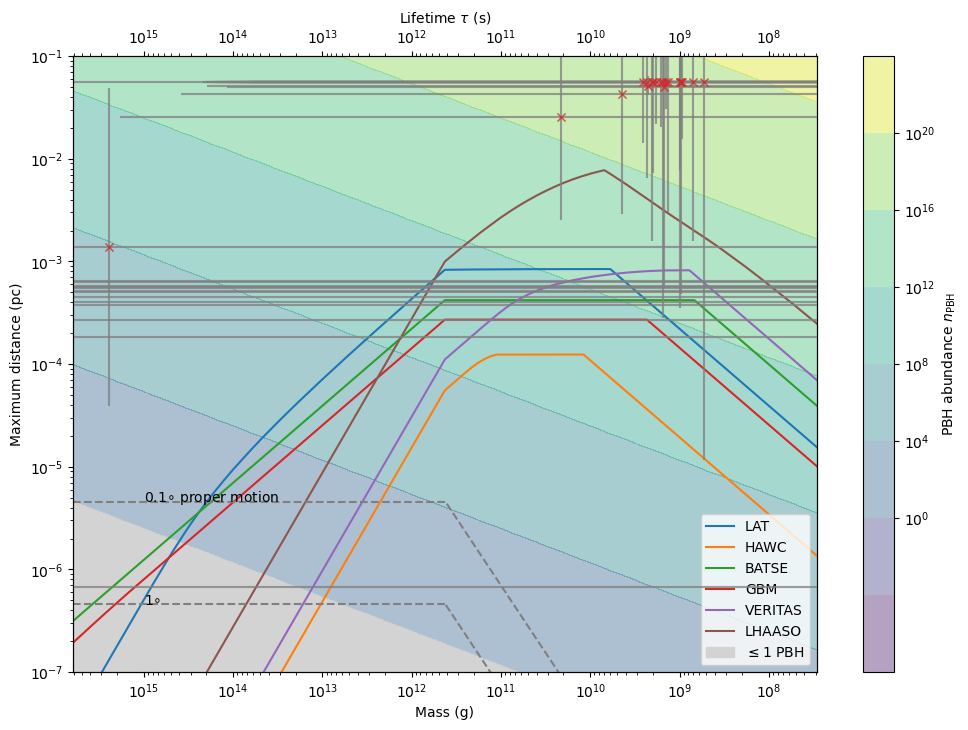

In [32]:
seconds_in_a_day = 8.64e4

##### Transient sources

distance_A = lambda A: np.sqrt(3.2 / A)

# Now show the fitted params overtop the fig
transients = pd.read_csv('../TransientLATSources/TransientSources_fitted_params.csv')#.query('distance<1e-2')

targets = transients.dropna()

T0 = seconds_in_a_day*targets['T0 (MJD)']
targets['T0_lower_error'] = np.abs(T0 - targets['T0_min'])
targets['T0_upper_error'] = np.abs(targets['T0_max'] - T0)
d = targets['distance (pc)']
targets['distance_lower_error'] = np.abs(d - targets['dist_max'])
targets['distance_upper_error'] = np.abs(targets['dist_min'] - d)

ax2.errorbar(x = T0, xerr = seconds_in_a_day*np.array([ targets['T0_lower_error'], targets['T0_upper_error'] ]),
            y = d, yerr = [ targets['distance_lower_error'], targets['distance_upper_error'] ],
            fmt = 'x', color='grey', markeredgecolor = 'C3', alpha=.5, zorder = 1)


fig.savefig('transient_fit_sources_on_det_curves.png')
fig

In [39]:
grbs[['PFLX_PLAW_INDEX', 'PFLX_PLAW_PHTFLUX', 'PFLX_PLAW_ERGFLUX']]

,PFLX_PLAW_INDEX,PFLX_PLAW_PHTFLUX,PFLX_PLAW_ERGFLUX
0,-1.455056,2.004649,3.451636e-07
1,-1.492061,2.499991,4.074234e-07
2,-1.410318,7.039733,1.305362e-06
3,-1.531715,2.349284,3.594267e-07
4,-1.496623,1.682684,2.716970e-07
...,...,...,...
383,-1.499151,46.203980,7.415733e-06
384,-1.551920,1.385606,2.044726e-07
385,-1.516897,1.551422,2.417145e-07
386,-1.507303,1.230312,1.948236e-07


In [80]:
selected[['NAME_x', 'PFLX_PLAW_INDEX', 'PFLX_PLAW_INDEX_POS_ERR', 'PFLX_PLAW_INDEX_NEG_ERR']]

NameError: name 'selected' is not defined

In [81]:
for i in range(len(selected)):
    t = selected.iloc[i]
    print( f' upper: {t["PFLX_PLAW_INDEX"] + t["PFLX_PLAW_INDEX_POS_ERR"]} lower: {t["PFLX_PLAW_INDEX"] - t["PFLX_PLAW_INDEX_NEG_ERR"]}')

NameError: name 'selected' is not defined

/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in exp
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xboluna/opt/miniconda3/envs/threeML/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/User

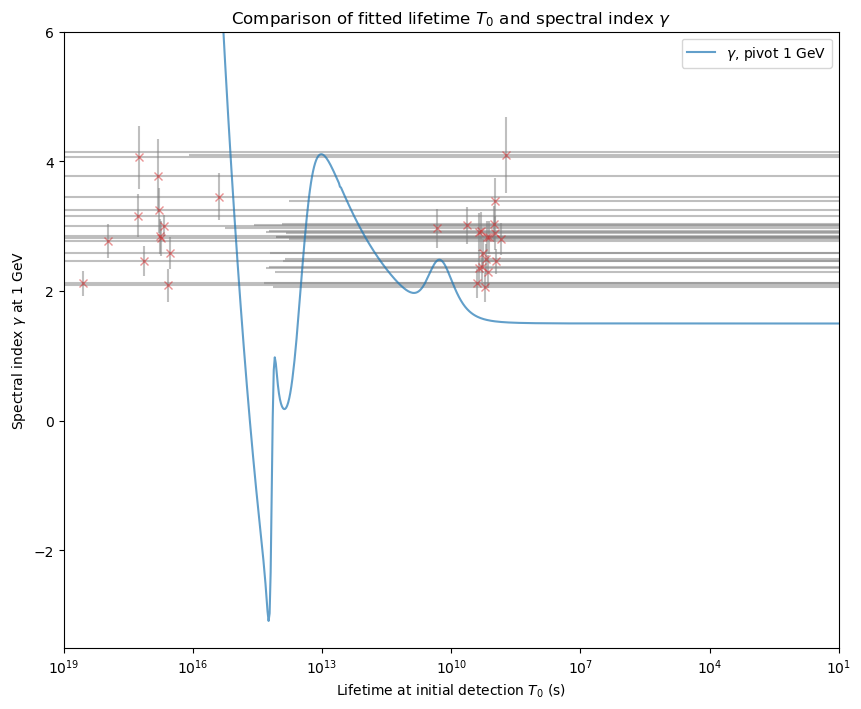

In [47]:
fig, ax = plt.subplots(figsize=(10,8))

gamma = lambda E1,E2, t : (np.log(parameter_photon_flux_mass(np.array([E1]),t)[0]) - np.log(parameter_photon_flux_mass(np.array([E2]),t)[0])) / (np.log(E2)-np.log(E1))

E1, E2 = (1.01, 0.99)
mass = np.logspace(8, 16, 1000)
index_evolution = [gamma(E1,E2, m) for m in mass]

ax.plot(tau_mass(mass), index_evolution, alpha = .7, label = r'$\gamma$, pivot 1 GeV')

interpolated_index_evolution = interp1d(tau_mass(mass), index_evolution, kind='linear', fill_value='extrapolate')

T0 = seconds_in_a_day*targets['T0 (MJD)']
targets['T0_lower_error'] = np.abs(T0 - targets['T0_min'])
targets['T0_upper_error'] = np.abs(targets['T0_max'] - T0)

ax.errorbar(x = T0, xerr = seconds_in_a_day*np.array([ targets['T0_lower_error'],  targets['T0_upper_error']]),
            y = targets['PLAW_PHOTON_INDEX'], yerr = [targets['PLAW_PHOTON_INDEX_ERROR'], targets['PLAW_PHOTON_INDEX_ERROR']],
            fmt = 'x', color='grey', markeredgecolor = 'C3', alpha=.5, zorder = 1)



# targets.query(

# )

# for i in range(len(targets)):
#     t = targets.iloc[i]
#     T0 = t['T0']
#     gamma = t['PLAW_PHOTON_INDEX']
#     ax.errorbar(x = [T0,T0], xerr = [ (T0 - t['T0_min']), (t['T0_max'] - T0) ],
#         y = [gamma, gamma], yerr = [ t['PLAW_PHOTON_INDEX_ERROR'], t['PLAW_PHOTON_INDEX_ERROR'] ],
#         fmt = 'x', color='grey', markeredgecolor = 'C3', alpha=.5, zorder = 1)

# for i in range(len(targets)):
#     t = targets.iloc[i]
#     T0 = t['T0']
#     gamma = t['PLAW_PHOTON_INDEX']
#     if (
#         #((t['PLAW_PHOTON_INDEX'] - t['PLAW_PHOTON_INDEX_ERROR']) <= 
#         (interpolated_index_evolution(t['T0_min']) <= (t['PLAW_PHOTON_INDEX'] + t['PLAW_PHOTON_INDEX_ERROR'])) or 
#         ((t['PLAW_PHOTON_INDEX'] - t['PLAW_PHOTON_INDEX_ERROR']) <= interpolated_index_evolution(t['T0_max']))# <= (t['PLAW_PHOTON_INDEX'] + t['PLAW_PHOTON_INDEX_ERROR']))
#     ):
#         ax.scatter(T0, gamma, marker = 'x', color = 'gold', zorder = 3) 

ax.set_xscale('log')
ax.set_xlim(1e19, 1e1)
ax.set_ylim(-3.5, 6)
ax.set_xlabel(r'Lifetime at initial detection $T_0$ (s)')
ax.set_ylabel(r'Spectral index $\gamma$ at 1 GeV')
ax.legend()
ax.set_title(r'Comparison of fitted lifetime $T_0$ and spectral index $\gamma$')
fig.savefig('Transients_gamma_vs_lifetime.png')

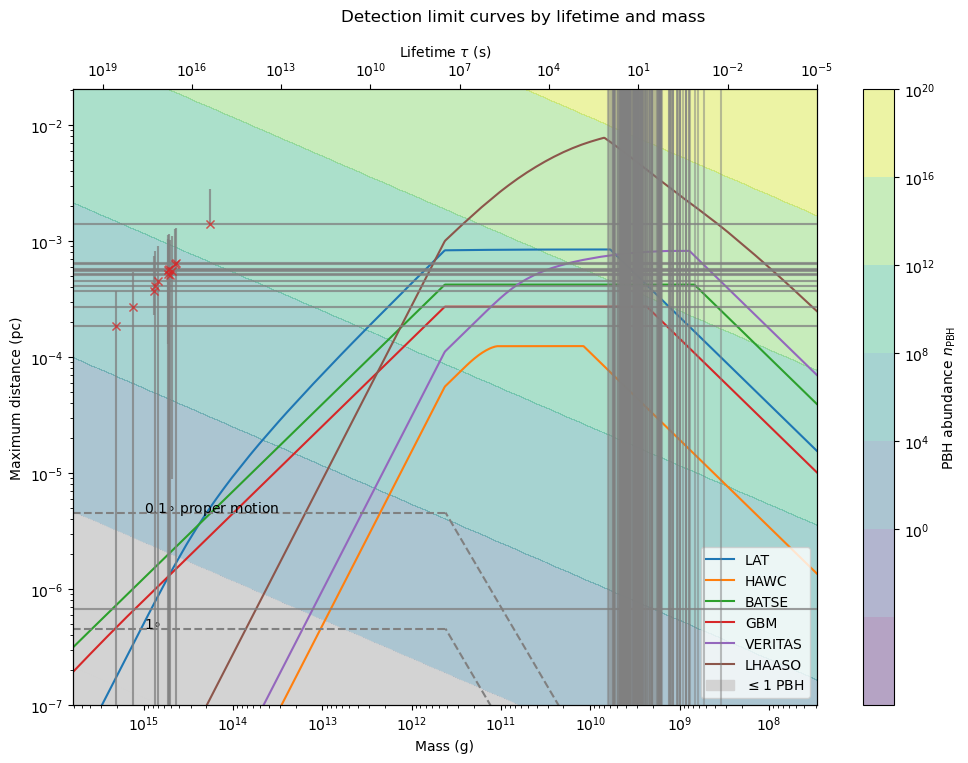

In [83]:
#### GRB GBM Catalog Sources

grbs = pd.read_csv('../GBM_Catalog_Searching/selectedGBMCatalogGRBs.csv')

ax2.errorbar(x = grbs['T90'], xerr = grbs['T90_ERROR'],
        y = grbs['DISTANCE'], yerr = grbs['DISTANCE_ERROR'],
        fmt = 'x', color='grey', markeredgecolor = 'C3', alpha=.5, zorder = 1)
    
    
ax2.scatter(grbs['T90'], grbs['DISTANCE'], marker = 'x', color = 'gold', zorder = 3)
fig

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


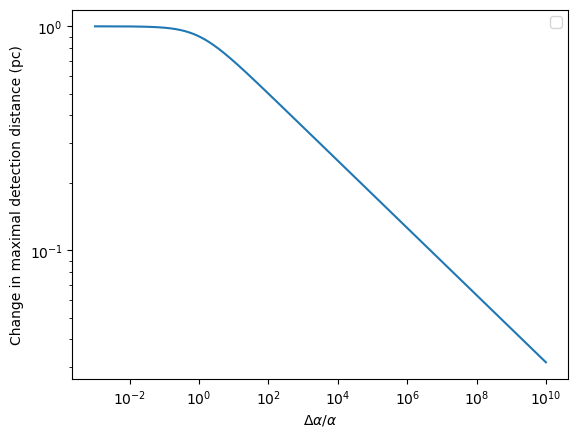

In [84]:
fig, ax = plt.subplots()

d_alpha = np.logspace(-3,10,1_000)

scale = lambda initial_d, d_alpha, beta = -.3 : np.sqrt((1+d_alpha)**beta) * initial_d

# for detector in EffectiveAreas:
ax.loglog(d_alpha, scale(1, d_alpha))
    # ax.scatter(d_alpha[0],distlim[detector], zorder = 1, alpha = .7)
ax.set_ylabel('Change in maximal detection distance (pc)')
ax.set_xlabel(r'$\Delta\alpha/\alpha$')
# ax.set_yscale('log')
ax.legend()

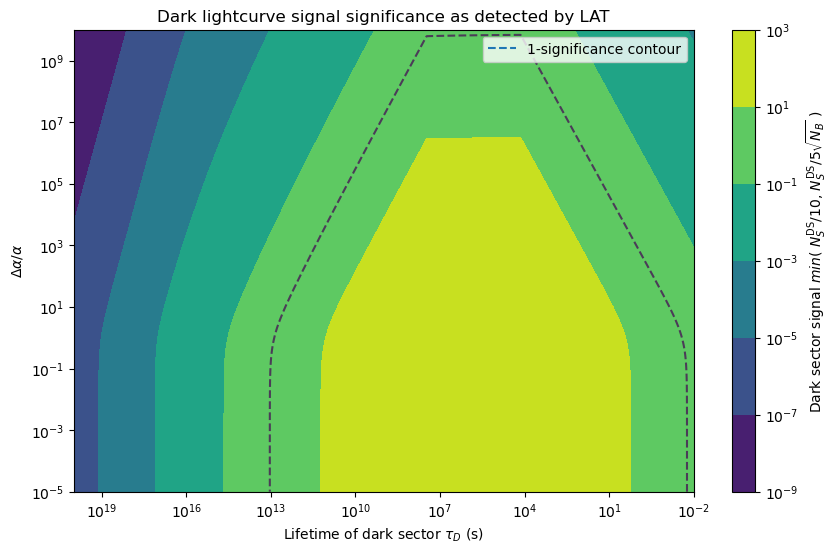

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

# detN is unscaled by distance
# Here's the play: we calculate N_S/10 and N_S/N_B/5, scaled by distance 1e-3pc
# Then we find the min of either -- anything >1 is then detectable to that sigma
# Contour that for variations in alpha and tau
d_alpha = np.logspace(-5, 10, 1_000)
remaining_lifetime = np.logspace(-2, 20, 1_000)
beta = -.3
distance = 1e-4 *u.pc.to('cm')


# Detector info
detector = 'LAT'
Erange = np.logspace(Eranges[detector][0], Eranges[detector][1])
Om = dOm[detector]
Aeff = interp1d( x = EffectiveAreas[detector]['E GeV'], y = EffectiveAreas[detector]['Aeff cm2'], kind='linear', bounds_error = False, fill_value = 0. )
tmin = remaining_lifetime[0]

dark_signal_mesh = []
# signal_mesh = []
for tau in remaining_lifetime:
    
    # Either obs duration or remaining lifetime
    obs_time = min(3e7, tau)

    # Calculate signal in dark sector case
    N = detN(Erange, tau, Aeff, Om, obs_time, tmin) / (4 * 3.14159 * distance**2)
    darkN = (1+d_alpha)**beta * N
    darkNs = detSN(darkN, Erange, Aeff, Om, obs_time, gamma_had_sep['LAT'])
    # darkNs = (1+d_alpha)**beta * Ns

    # Choose mins for sigmas
    dark_signal_mesh.append( [min(
        darkN[i] / 10,
        darkNs[i] / 5
        ) for i,_ in enumerate(darkN) ] )

    # signal_mesh.append( 
    #     [min(
    #         N[i] / 10,
    #         Ns[i] / 5
    #     ) for i,_ in enumerate(N) ] )

# signal_mesh = np.array(signal_mesh)
dark_signal_mesh = np.array(dark_signal_mesh)

d_alpha, remaining_lifetime = np.meshgrid(d_alpha, remaining_lifetime)

levels = np.arange(-9, 5, 2)

im = ax.contourf(remaining_lifetime, d_alpha, np.log10(dark_signal_mesh), levels = levels)
cb = fig.colorbar(im, label = r'Dark sector signal $min$( $N^{\rm{DS}}_S/10$, $N^{\rm{DS}}_S/5\sqrt{N_B}$ )', ticks = levels)
cb.ax.set_yticklabels( [r'$10^{%.f}$'%t for t in levels]  )

ax.contour(remaining_lifetime, d_alpha, np.log10(dark_signal_mesh), levels = [0], linestyles = '--', alpha = .7)
ax.plot(0,0,'--', label = '1-significance contour')

# im = axes[1].contourf(remaining_lifetime, d_alpha, signal_mesh)
# cb = fig.colorbar(im, label = r'Signal min( $N_S/10$, $N_S/5\sqrt{N_B}$ )')

# for ax in axes:
ax.set_ylabel(r'$\Delta\alpha/\alpha$')
ax.set_xlabel(r'Lifetime of dark sector $\tau_D$ (s)')
ax.set_xlim(ax.get_xlim()[1], ax.get_xlim()[0])
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Dark lightcurve signal significance as detected by LAT')
ax.legend()

fig.savefig('N_S_vs_alpha_D.png')

N_hem: 215 S_hem: 206 ratio: 1.0436893203883495
W_hem: 224 E_hem: 224 ratio: 0.8794642857142857


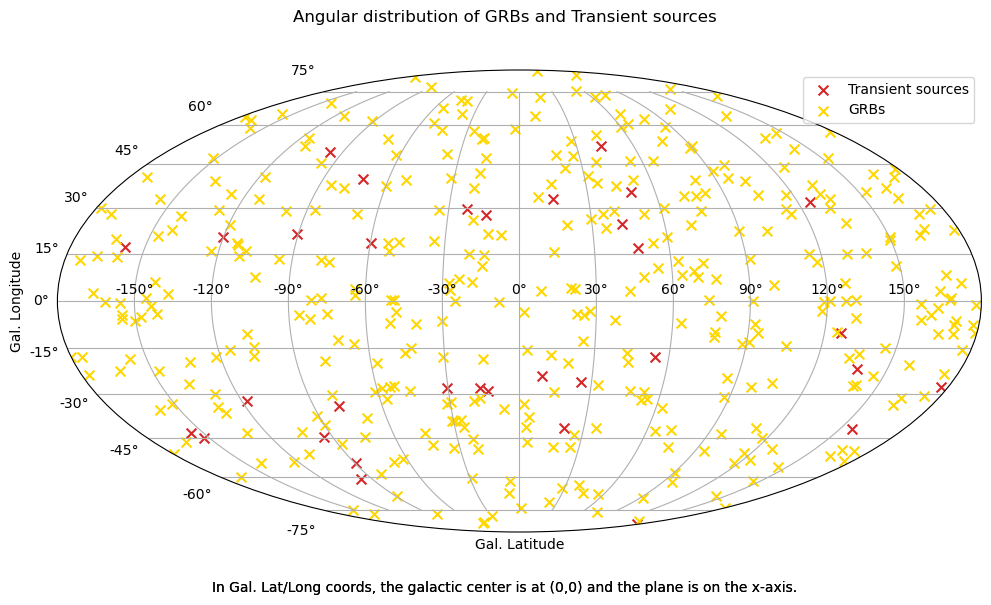

In [48]:
transients = pd.read_csv('../TransientLATSources/TransientSources_fitted_params.csv')
targets = transients.dropna()
grbs = pd.read_csv('../GBM_Catalog_Searching/selectedGBMCatalogGRBs.csv')


fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='mollweide')
plt.grid(True)

grbs['LII'] = grbs['LII_x']
grbs['BII'] = grbs['BII_x']

colors = ('C3', 'gold')
labels = ('Transient sources', 'GRBs')

N_hem = 0
S_hem = 0
E_hem = 0
W_hem = 0

for i,modified in enumerate([targets.copy(), grbs.copy()]):
    
    modified.loc[modified['LII']>180, 'LII'] -= (360)

    N_hem += modified.query('BII > 0').shape[0]
    S_hem += modified.query('BII < 0').shape[0]
    W_hem += modified.query('LII < 0').shape[0]
    E_hem += modified.query('LII > 0').shape[0]
    
    ax.scatter(modified['LII']*(np.pi/180), modified['BII']*(np.pi/180), 50, marker = 'x', color = colors[i], label = labels[i])

    ax.set_ylabel('Gal. Longitude')
    ax.set_xlabel('Gal. Latitude')

    caption = 'In Gal. Lat/Long coords, the galactic center is at (0,0) and the plane is on the x-axis.'

    plt.figtext(0.5, 0.01, 
                caption, 
                horizontalalignment='center', fontsize=10)
    
ax.legend()
fig.suptitle('Angular distribution of GRBs and Transient sources')

# fig.suptitle('All unassociated transient sources')
fig.savefig('GRB_and_transients_source_dist.png')

print(f'N_hem: {N_hem} S_hem: {S_hem} ratio: {N_hem/S_hem}')
print(f'W_hem: {E_hem} E_hem: {E_hem} ratio: {W_hem/E_hem}')

In [60]:
import glob

# Collect files
datasets = glob.glob('../TransientLATSources/correct_unassociated/apjsac*.csv')

# Track SRCNumber
filename = []
filenumber = []

library = {} # key = filename, val = pd.DataFrame
for file in datasets:
    # Read in data for each file
    library['.%s'%file[22:]] = pd.read_csv(file, header=None)
    
    # Track SRCNumber
    filename.append(file)
    filenumber.append( int(file.split('_')[2]) )

# Reformat datasets
def reformat_datasets(library):
    reformat = {}

    for key in library:

        # For each dataset
        d = library[key]
        x = []
        y = []
        yerr = []
        # For each row
        for i in range(d.shape[0]):
            # Odds are data, evens are upper/lower error bound
            if i % 2:
                yerr.append(d.iloc[i,1])
            else:
                x.append(d.iloc[i,0])
                y.append(d.iloc[i,1])

        # Make error always positive
        yerr = np.abs(np.array(y) - np.array(yerr))

        # Reformat pd appropriately
        reformat[key] = pd.DataFrame( {'MJD':x, 'Fl (E>100MeV)e-8 cm-2 s-1':y, 'Error':yerr} )

    return reformat

library = reformat_datasets(library)

In [61]:
filenames = list(library.keys())
lc_transients = pd.read_csv('../TransientLATSources/TransientSources_fitted_params.csv').query('filename in @filenames')

# This is MJD where 54500 = Aug 4 15:43:36 UTC, 2008 -- we can constrain to day-precision 
# Let's MJD as an MET
lc_transients['Start MET (MJD)'] = [ library[filename]['MJD'].iloc[0] - 54500 for filename in lc_transients['filename'] ]
lc_transients['End MET (MJD)'] = [ library[filename]['MJD'].iloc[-1] - 54500 for filename in lc_transients['filename'] ]
# targets['Start sec'] = targets['Start MJD'] * 86400
# targets['End sec'] = targets['End MJD'] * 86400

# Then the GBM Catalog names are yymmdd for 2000-yy so we can definitely track to day-precision
def breakdown_GRBName_to_s(NAME):
    year = (int(NAME[5:7]) - 8) * 365 # yr - 2008
    month = (int(NAME[7:9]) - 8) * 30.42 # mo. - 8 (Aug)
    days = year + month + int(NAME[9:11]) - 4 # 4th of Aug
    return days
    
grbs['Burst MET (MJD)'] = grbs['NAME_x'].apply(breakdown_GRBName_to_s)

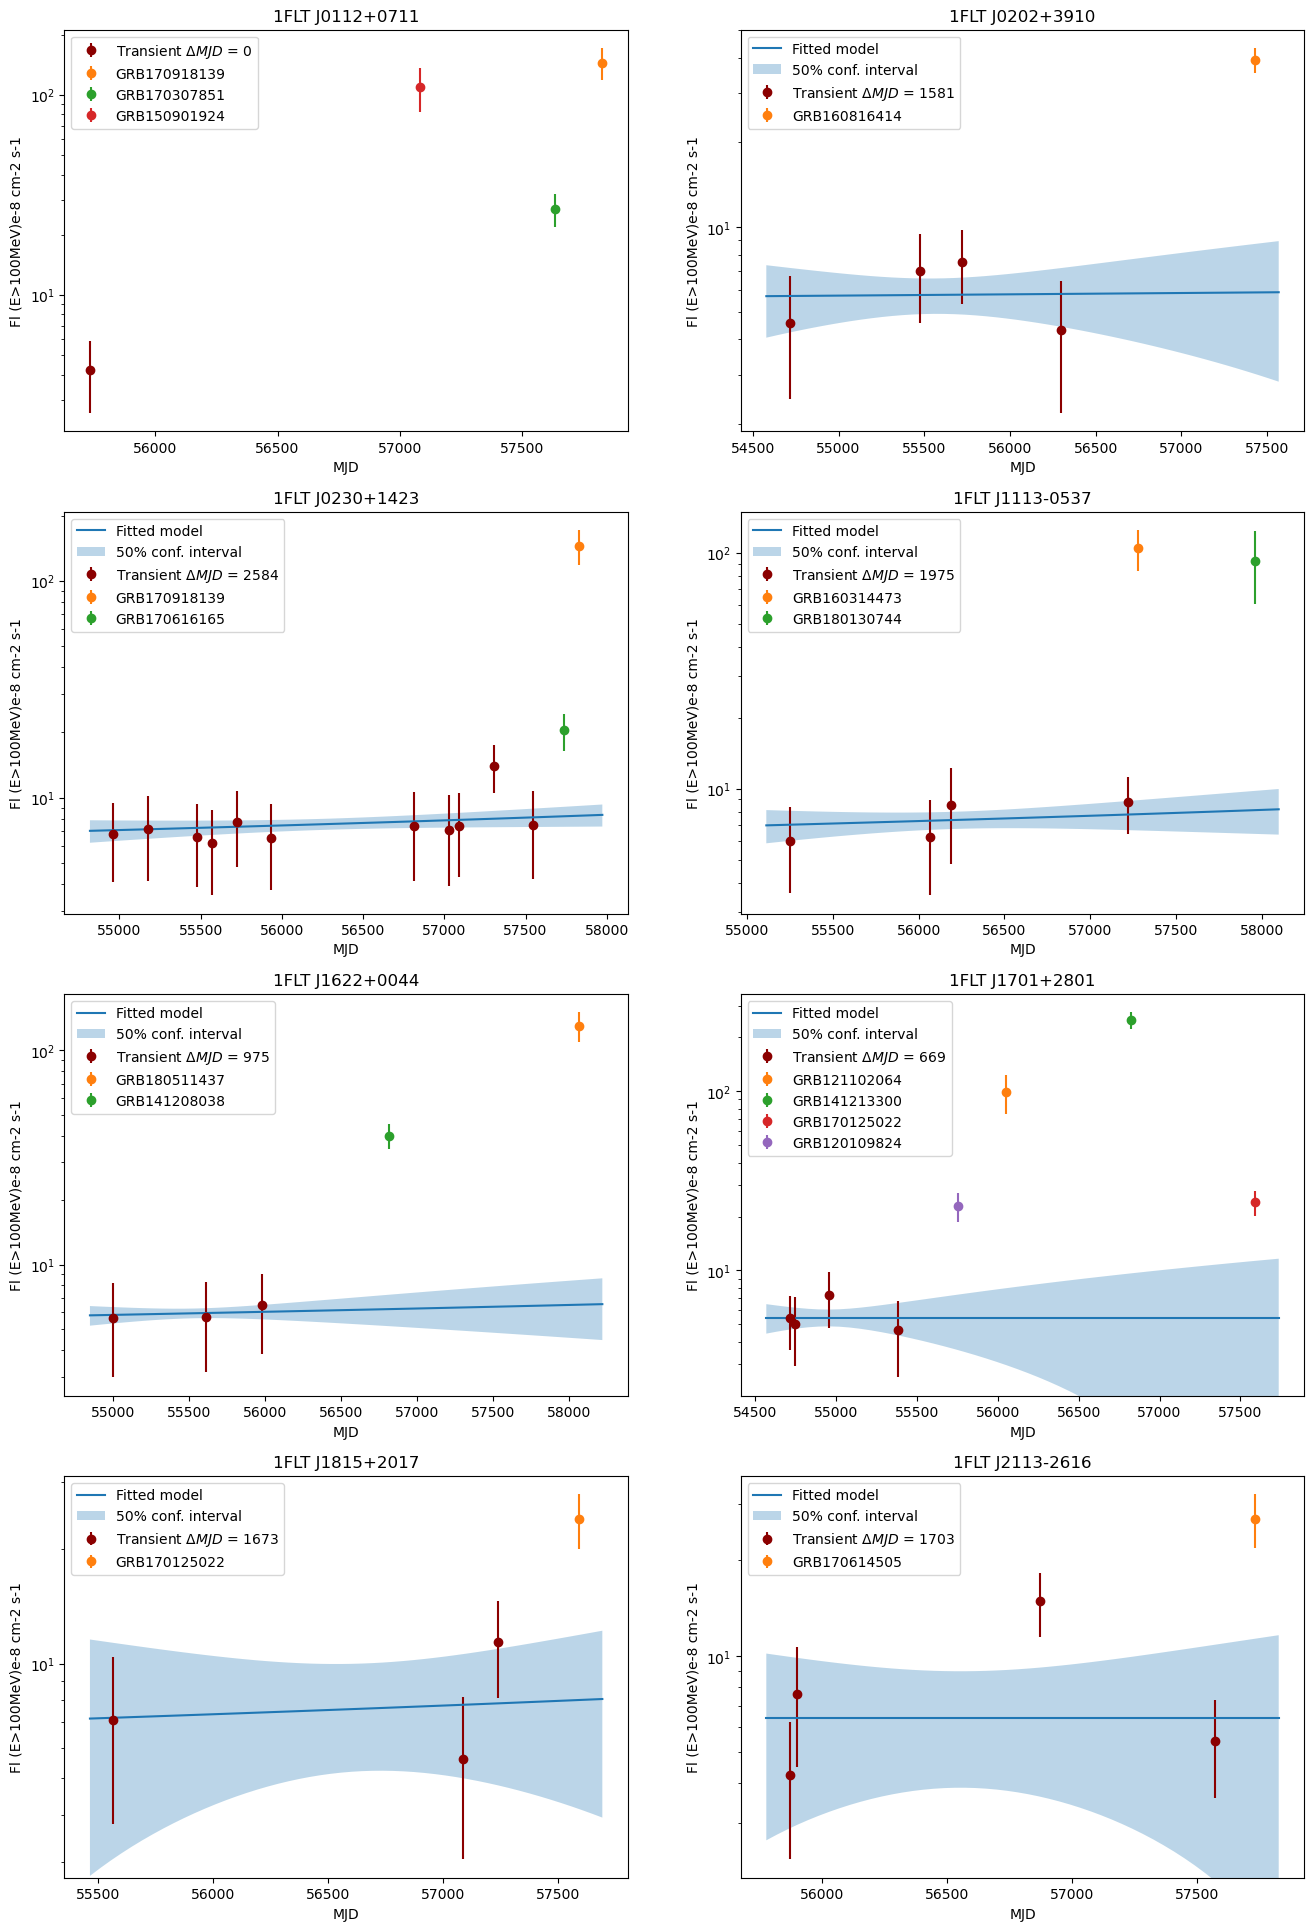

In [65]:
from scipy import stats
def propagate_error(a, b, e_a, e_b):
    return np.abs(a/b) * np.sqrt( (e_a/a)**2 + (e_b/b) )

log_model = lambda x,A,T0: 10**A * ((10**T0) - x)**(-.53) # T0 in MJD!!

# Retrieve GRBs in the transients' ROI
degs_per_year = 1
associated = {}
for i in range(len(lc_transients)):
    t = lc_transients.iloc[i]

    grbs_in_ROI = []

    for j in range(len(grbs)):
        s = grbs.iloc[j]
        dt = s['Burst MET (MJD)'] - t['End MET (MJD)'] # Diff from last transient detection to burst detection
        if (
            dt >= 0# Burst time > last detected transient time
            and
            np.sqrt((t['RA'] - s['RA_x'])**2 + (t['DEC'] - s['DEC_x'])**2) - (s['ERROR_RADIUS_x'] + t['SEMI_MAJOR_AXIS']/60) < degs_per_year*(dt/365) # 1 deg/yr after last detection
            ): 
            grbs_in_ROI.append(s['NAME_x'])
    
    if len(grbs_in_ROI) > 0: associated[t['filename']] = grbs_in_ROI


l = 4
w = 2
fig, axes = plt.subplots(l,w, figsize=(w*8,l*6))
axes = axes.flatten()
for i,source in enumerate(associated):
    ax = axes[i]


    # Plot transient lightcurve
    x = library[source]['MJD'].to_numpy()
    y = library[source]['Fl (E>100MeV)e-8 cm-2 s-1'].to_numpy()
    yerr = library[source]['Error'].to_numpy()
    
    ax.errorbar(x = x, y = y, yerr = yerr,
        fmt='o', color = 'darkred', label = r'Transient $\Delta MJD$ = '+'%i'%(x[-1] - x[0]))

    # Plot individual GRBs in ROI
    for c,name in enumerate(associated[source]):
        grb = grbs.query('NAME_x == @name')
        ax.errorbar(
            x = grb['Burst MET (MJD)'] + 54500,
            y = grb['PFLX_PLAW_ERGFLUX']*1e8,
            yerr = grb['PFLX_PLAW_ERGFLUX_ERROR']*1e8,
            fmt = 'o',
            color = 'C%s'%(c+1),
            label = name[2:-1])
    # ax.errorbar(x[0],0,0,fmt='o',color='y', label = 'Candidate GRBs')
            

    # ax.set_xscale('log')
    ax.set_yscale('log')

    if x.shape[0] > 1:
        # Plot fitted model
        t = transients.query('filename == @source').iloc[0]
        coefs = ( np.log10(t['norm (3.2e-8/pc^2)']), np.log10(t['T0 (MJD)']) )
        xinterval = np.linspace(*ax.get_xlim()) - x[0]
        y_model = log_model(xinterval, *coefs)
        ax.plot(xinterval + x[0], y_model, color = 'C0', label = 'Fitted model')

        # Save ylims to restore later (negate stretching by confidence interval)
        ylims = ax.get_ylim()

        # Calculate confidence interval
        # https://www.scribbr.com/statistics/confidence-interval/
        # https://tomholderness.wordpress.com/2013/01/10/confidence_intervals/
        n = len(y)
        p = len(coefs)
        dof = max(0, n - p)  # degrees of freedom
        t = stats.t.ppf(.5 / 2., dof) # 50% confidence interval

        s_err = np.sum(np.power(y - log_model(x - x[0], *coefs), 2))
        mean_x = np.mean(x - x[0])
        
        confs = t * np.sqrt(
            ( s_err / dof) * 
            (1.0/ n + 
                (np.power( (xinterval - mean_x) ,2) /
                    ( (np.sum(np.power(x - x[0],2))) - n*(np.power(mean_x,2)) )
                )
            )
            )

        ax.fill_between(xinterval + x[0], y_model - np.abs(confs), y_model + np.abs(confs), alpha=0.3, label=r'50% conf. interval')

        # Restore ylims
        ax.set_ylim(*ylims)

    # Settings
    ax.set_title(transients.query('filename == @source').iloc[0]['NAME'][2:-1])
    ax.set_xlabel('MJD')
    ax.set_ylabel('Fl (E>100MeV)e-8 cm-2 s-1')

    ax.legend()

# fig.delaxes(axes[-1])
        
fig.savefig('GRBs_Trans_in_1deg_yr.png')
# associated

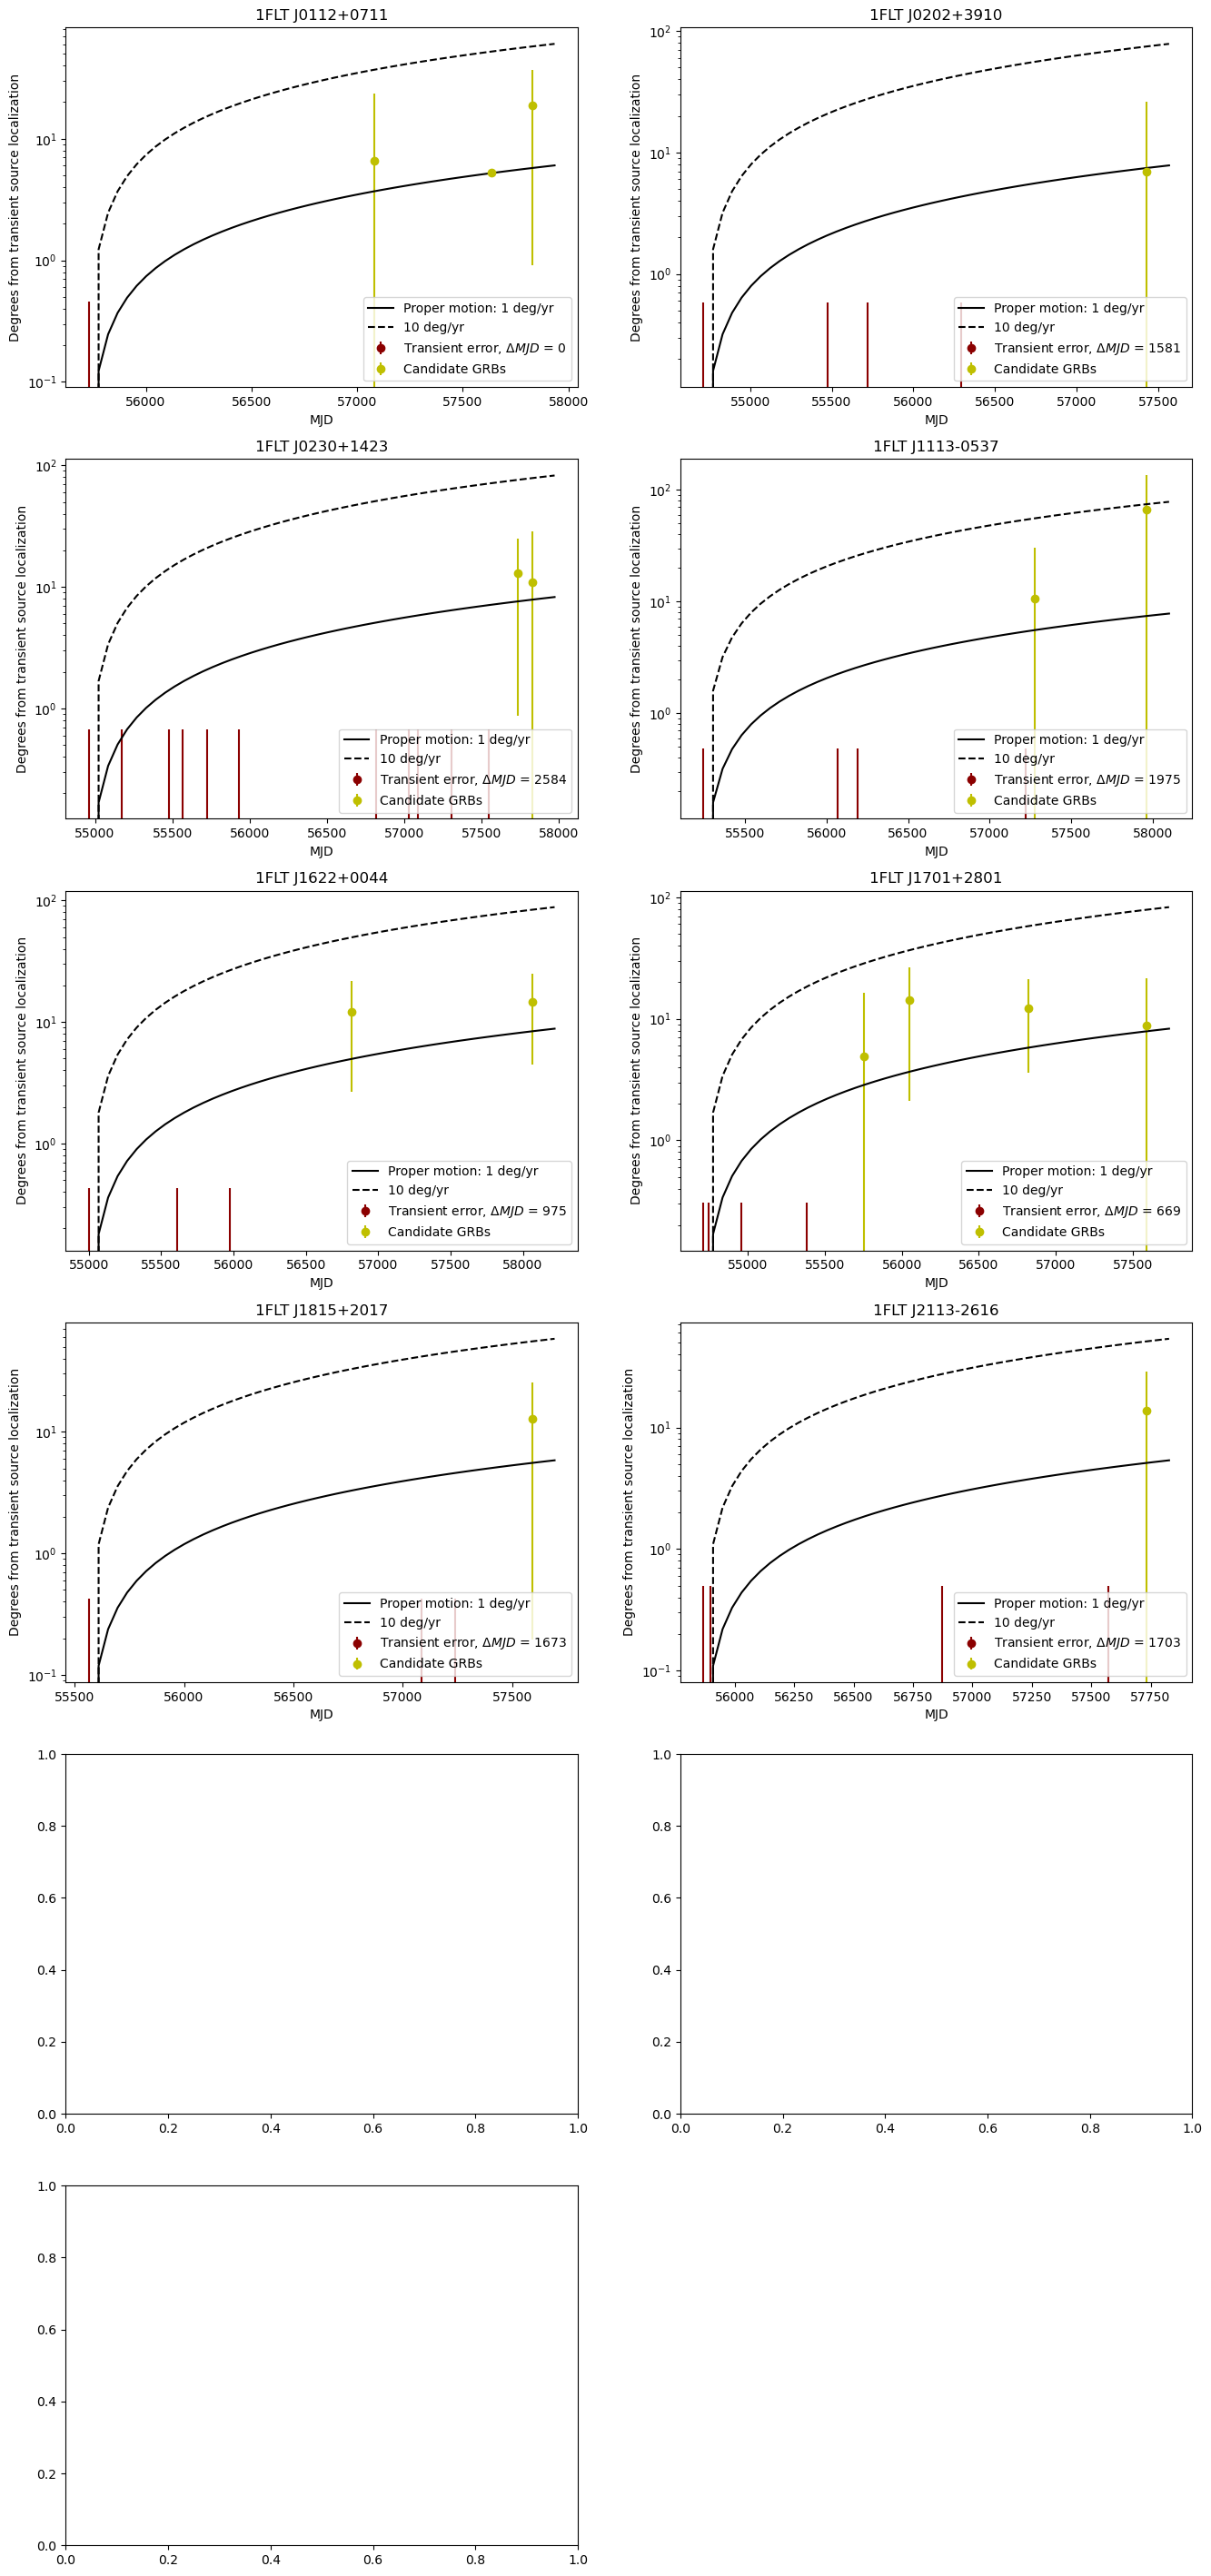

In [52]:
degs_per_year = 1
associated = {}
for i in range(len(lc_transients)):
    t = lc_transients.iloc[i]

    grbs_in_ROI = []

    for j in range(len(grbs)):
        s = grbs.iloc[j]
        dt = s['Burst MET (MJD)'] - t['End MET (MJD)'] # Diff from last transient detection to burst detection
        if (
            dt >= 0# Burst time > last detected transient time
            and
            np.sqrt((t['RA'] - s['RA_x'])**2 + (t['DEC'] - s['DEC_x'])**2) - (s['ERROR_RADIUS_x'] + t['SEMI_MAJOR_AXIS']/60) < degs_per_year*(dt/365) # 1 deg/yr after last detection
            ): 
            grbs_in_ROI.append(s['NAME_x'])
    
    if len(grbs_in_ROI) > 0: associated[t['filename']] = grbs_in_ROI

l = 6
w = 2
fig, axes = plt.subplots(l,w, figsize=(w*8,l*6))
axes = axes.flatten()
for i,source in enumerate(associated):
    ax = axes[i]

    # Transient
    t = transients.query('filename == @source').iloc[0]

    # Plot transient lightcurve
    x = library[source]['MJD'].to_numpy()
    y = library[source]['Fl (E>100MeV)e-8 cm-2 s-1'].to_numpy()
    yerr = library[source]['Error'].to_numpy()
    
    ax.errorbar(x = x, y = np.zeros(len(x)), yerr = t['SEMI_MAJOR_AXIS']/60,
        fmt='o', color = 'darkred', label = r'Transient error, $\Delta MJD$ = '+'%i'%(x[-1] - x[0]))

    # Plot individual GRBs in ROI
    for c,name in enumerate(associated[source]):
        grb = grbs.query('NAME_x == @name')
        ax.errorbar(
            x = grb['Burst MET (MJD)'] + 54500,
            y = np.sqrt((t['RA'] - grb['RA_x'])**2 + (t['DEC'] - grb['DEC_x'])**2),
            yerr = grb['ERROR_RADIUS_x'],
            fmt = 'o', color = 'y')
            #color = 'C%s'%(c+1))#,
            # label = name[2:-1])
    ax.errorbar(x[0],0,0,fmt='o',color='y', label = 'Candidate GRBs')

    xaxis = np.linspace(x[0], ax.get_xlim()[-1])
    ax.plot( xaxis, (xaxis-x[0])/365, color = 'black', label = 'Proper motion: 1 deg/yr')
    ax.plot( xaxis, 10*(xaxis-x[0])/365, '--', color = 'black', label = '10 deg/yr')

    # Settings
    ax.set_title(transients.query('filename == @source').iloc[0]['NAME'][2:-1])
    ax.set_xlabel('MJD')
    ax.set_ylabel('Degrees from transient source localization')
    ax.set_yscale('log')

    ax.legend()

fig.delaxes(axes[-1])
fig.savefig('Localization_transients_grbs.png')

In [53]:
seconds_in_a_day = 8.64e8

### LAT Transients Table

string = ''
for i in range(len(lc_transients)):
    t = lc_transients.iloc[i]
    string += '%s & '%t['NAME'][2:-1]
    string += '%s & '%t['RA']
    string += '%s & '%t['DEC']
    # try: 
    string += '%.2e & '%(t['T0 (MJD)']*seconds_in_a_day)
    string += '%.2e & '%(t['T0_max']*seconds_in_a_day)
    string += '%.2e & '%(t['T0_min']*seconds_in_a_day)
    string += '%.2e & '%t['distance (pc)']
    string += '%.2e & '%t['dist_min']
    string += '%.2e & '%t['dist_max']
    # except: 
    #     string += '- & - & - & - & - & - & '
    
    string += '%s & '%t['PLAW_PHOTON_INDEX']
    string += '%s \\ '%t['PLAW_PHOTON_INDEX_ERROR']



    # string += f'{} & {t['RA']} & {t['DEC']} & {t['T0']:.2e} & {t['T0_upper_error']:.2e} & {t['T0_lower_error']:.2e} & {t['distance']:.2e} & {t['distance_upper_error']:.2e} & {t['distance_lower_error']:.2e} & {t['PLAW_PHOTON_INDEX']} & {t['PLAW_PHOTON_INDEX_ERROR']} \\\\'
    #targets[['NAME', 'RA', 'DEC', 'PLAW_PHOTON_INDEX', 'PLAW_PHOTON_INDEX_ERROR', 'T0','T0_lower_error', 'T0_upper_error', 'distance', 'distance_lower_error', 'distance_upper_error' ]]
string

'1FLT J0112+0711 & 18.21 & 7.196 & nan & nan & nan & nan & nan & nan & 2.289 & 0.26 \\ 1FLT J0115+5230 & 18.858 & 52.515 & 1.61e+13 & 1.25e+14 & 2.08e+12 & 5.66e-02 & 1.57e-01 & 2.03e-02 & 2.058 & 0.225 \\ 1FLT J0115-2237 & 18.957 & -22.63 & 2.55e+13 & 4.05e+14 & 1.60e+12 & 5.66e-02 & 2.25e-01 & 1.42e-02 & 2.12 & 0.223 \\ 1FLT J0202+3910 & 30.599 & 39.172 & 4.41e+13 & 9.57e+15 & 2.03e+11 & 4.23e-02 & 6.24e-01 & 2.87e-03 & 3.013 & 0.285 \\ 1FLT J0230+1423 & 37.638 & 14.393 & 9.84e+12 & 2.53e+17 & 3.83e+08 & 5.66e-02 & 9.07e+00 & 3.53e-04 & 3.388 & 0.352 \\ 1FLT J0240-4657 & 40.158 & -46.951 & 5.67e+20 & 3.22e+25 & 1.00e+16 & 5.72e-04 & 1.36e-01 & 2.40e-06 & 2.842 & 0.264 \\ 1FLT J0259-5406 & 44.842 & -54.103 & 2.03e+13 & 2.55e+16 & 1.61e+10 & 5.66e-02 & 2.01e+00 & 1.59e-03 & 2.922 & 0.3 \\ 1FLT J0343+1200 & 55.757 & 12.004 & nan & nan & nan & nan & nan & nan & 2.496 & 0.233 \\ 1FLT J0357-1509 & 59.404 & -15.155 & 6.56e+20 & 8.76e+23 & 4.91e+17 & 5.17e-04 & 1.89e-02 & 1.41e-05 & 3.782 & 

In [108]:
name

["b'GRB170918139'", "b'GRB170307851'", "b'GRB150901924'"]

In [115]:
str = ''
for i in range(len(associated_GRBs)):
    t = associated_GRBs.iloc[i]
    str += '\'%s\', '%t['NAME_x'][2:-1]
str

"'GRB170614505', 'GRB160314473', 'GRB170918139', 'GRB180511437', 'GRB170307851', 'GRB141208038', 'GRB150901924', 'GRB121102064', 'GRB141213300', 'GRB170616165', 'GRB170125022', 'GRB120109824', 'GRB160816414', 'GRB180130744', "

In [73]:
#### GRBs in ROI Table

associated_GRBs = [x for l in associated.values() for x in l]
associated_GRBs = grbs.query('NAME_x in @associated_GRBs')

string1 = ''
string2 = ''

for i in range(len(associated_GRBs)):
    t = associated_GRBs.iloc[i]
    string1 += '%s & '%t['NAME_x'][2:-1]
    string1 += '%.2f & '%t['RA_x']
    string1 += '%.2f & '%t['DEC_x']
    string1 += '%.2f & '%t['ERROR_RADIUS_x']
    string1 += '%.2e & '%t['PFLX_PLAW_ERGFLUX']
    string1 += '%.2e & '%t['PFLX_PLAW_ERGFLUX_ERROR']
    string1 += '%.2f & '%t['T9050']
    string1 += '%.2f \\\ '%t['T9050_ERROR']

    string2 += '%s & '%t['NAME_x'][2:-1]
    string2 += '%.2e & '%(t['Burst MET (MJD)'] + 54500)
    string2 += '%.2f & '%t['T90']
    string2 += '%.2f & '%t['T90_ERROR']
    string2 += '%.2f & '%t['PFLX_PLAW_INDEX']
    string2 += '%.2f & '%t['PFLX_PLAW_INDEX_POS_ERR']
    string2 += '%.2f \\\ '%t['PFLX_PLAW_INDEX_NEG_ERR']

print(string1)
print(string2)


GRB170614505 & 310.99 & -37.91 & 15.16 & 2.71e-07 & 5.19e-08 & 2.10 & 1.62 \\ GRB160314473 & 161.99 & 2.83 & 19.99 & 1.04e-06 & 2.04e-07 & 8.67 & 15.87 \\ GRB170918139 & 36.56 & 3.52 & 17.81 & 1.45e-06 & 2.67e-07 & 4.00 & 6.96 \\ GRB180511437 & 257.78 & 9.07 & 10.16 & 1.30e-06 & 2.09e-07 & 2.58 & 1.78 \\ GRB170307851 & 13.54 & 9.54 & 0.05 & 2.69e-07 & 5.10e-08 & 2.06 & 0.79 \\ GRB141208038 & 239.16 & 10.97 & 9.49 & 4.01e-07 & 5.41e-08 & 1.93 & 0.57 \\ GRB150901924 & 16.34 & 13.52 & 17.12 & 1.09e-06 & 2.73e-07 & 2.00 & 9.29 \\ GRB121102064 & 258.47 & 14.09 & 12.15 & 9.90e-07 & 2.45e-07 & 1.60 & 1.52 \\ GRB141213300 & 248.19 & 18.06 & 8.72 & 2.49e-06 & 2.72e-07 & 4.00 & 3.62 \\ GRB170616165 & 49.51 & 19.67 & 12.12 & 2.04e-07 & 3.93e-08 & 2.27 & 0.74 \\ GRB170125022 & 264.14 & 28.58 & 12.65 & 2.40e-07 & 3.93e-08 & 2.44 & 1.49 \\ GRB120109824 & 251.33 & 30.80 & 11.33 & 2.29e-07 & 4.15e-08 & 2.25 & 0.72 \\ GRB160816414 & 25.32 & 43.70 & 19.13 & 3.93e-07 & 3.94e-08 & 2.19 & 1.53 \\ GRB180130

In [71]:
associated_GRBs

,Unnamed: 0,NAME_x,RA_x,DEC_x,TRIGGER_TIME_x,T90,T90_ERROR,T90_START,FLUENCE,FLUENCE_ERROR,...,THETA,PHI,LOCALIZATION_SOURCE,T9050,T9050_ERROR,DISTANCE,DISTANCE_ERROR,LII,BII,Burst MET (MJD)
74,779,b'GRB170614505',310.990,-37.910,57918.504615,5.376,1.639,-2.048,4.235100e-07,4.714700e-08,...,107.0030,225.0040,"b'Fermi, GBM \n'",2.100000,1.617065,0.343910,0.785048,4.4681,-37.6786,3234.16
189,1875,b'GRB160314473',161.990,2.830,57461.473212,1.664,0.730,-0.704,1.322600e-07,1.768200e-08,...,89.9917,191.0000,"b'Fermi, GBM \n'",8.666667,15.871877,0.175057,0.395870,247.0326,51.7662,2777.90
194,1891,b'GRB170918139',36.560,3.520,58014.139154,0.128,0.163,-0.032,8.847800e-08,1.172100e-08,...,108.0010,144.0060,"b'Fermi, GBM \n'",4.000000,6.960337,0.148648,0.346044,163.3334,-51.7570,3329.42
212,2044,b'GRB180511437',257.780,9.070,58249.437414,1.984,0.968,-0.256,7.653200e-07,1.823700e-08,...,54.0000,197.0000,"b'Fermi, GBM \n'",2.583333,1.778052,0.156905,0.390943,29.6961,26.3855,3565.74
213,2057,b'GRB170307851',13.535,9.537,57819.850897,28.416,1.717,-2.304,1.439200e-06,2.552900e-08,...,97.2142,20.5357,"b'Swift, BAT \n'",2.055556,0.791468,0.345155,0.792361,124.0474,-53.3289,3135.90
217,2084,b'GRB141208038',239.160,10.970,56999.038229,14.336,1.448,-1.024,1.773900e-06,3.092100e-08,...,110.7390,321.1070,"b'Fermi, GBM \n'",1.931034,0.570389,0.282579,0.769429,21.7805,43.6623,2315.68
223,2146,b'GRB150901924',16.340,13.520,57266.924126,0.256,1.145,-0.064,1.545500e-07,3.235200e-08,...,119.9960,181.0000,"b'Fermi, GBM \n'",2.000000,9.291454,0.171129,0.342559,128.1160,-49.2116,2582.42
224,2163,b'GRB121102064',258.470,14.090,56233.064444,2.048,1.379,-1.536,5.671600e-07,6.226500e-08,...,103.9970,328.9960,"b'Fermi, GBM \n'",1.600000,1.518114,0.179783,0.361175,35.1384,27.8695,1549.26
236,2284,b'GRB141213300',248.190,18.060,57004.300179,0.768,0.513,-0.064,6.581500e-07,1.972700e-08,...,88.0109,41.9996,"b'Fermi, GBM \n'",4.000000,3.624764,0.113310,0.342916,35.0782,38.5122,2320.68
243,2325,b'GRB170616165',49.510,19.670,57920.165364,56.320,6.085,0.000,1.877100e-06,3.485200e-08,...,61.0000,38.0000,"b'Fermi, GBM \n'",2.268041,0.740897,0.395755,0.902105,164.0447,-31.2571,3236.16
